In [59]:
import pandas as pd
import numpy as np
import matplotlib
import time # for benchmarking

In [60]:
#define convergent sequence function of n here:
def a_n(n):
    # limit must be 0, though i suppose i can generalize it by having you input the limit (you'd have to already know it)
    return (1 / n) * np.sin(n) # just an example

In [61]:
def sigma(n):
    if n == 1:
        output = 1
        while a_n(output) <= 0:
            output += 1
        return output
    prev = sigma(n - 1)
    output = prev + 1 # no repeating of the same index
    while (not a_n(prev) > a_n(output) > 0):
        output += 1
    return output

In [62]:
def calculate_n_sigma_values(n):
    if n == 1:
        value = 1
        while a_n(value) <= 0:
            value += 1
        return [value]
    arr = calculate_n_sigma_values(n - 1)
    prev = arr[-1]
    value = prev + 1
    while (not a_n(prev) > a_n(value) > 0):
        value += 1
    arr.append(value)
    return arr

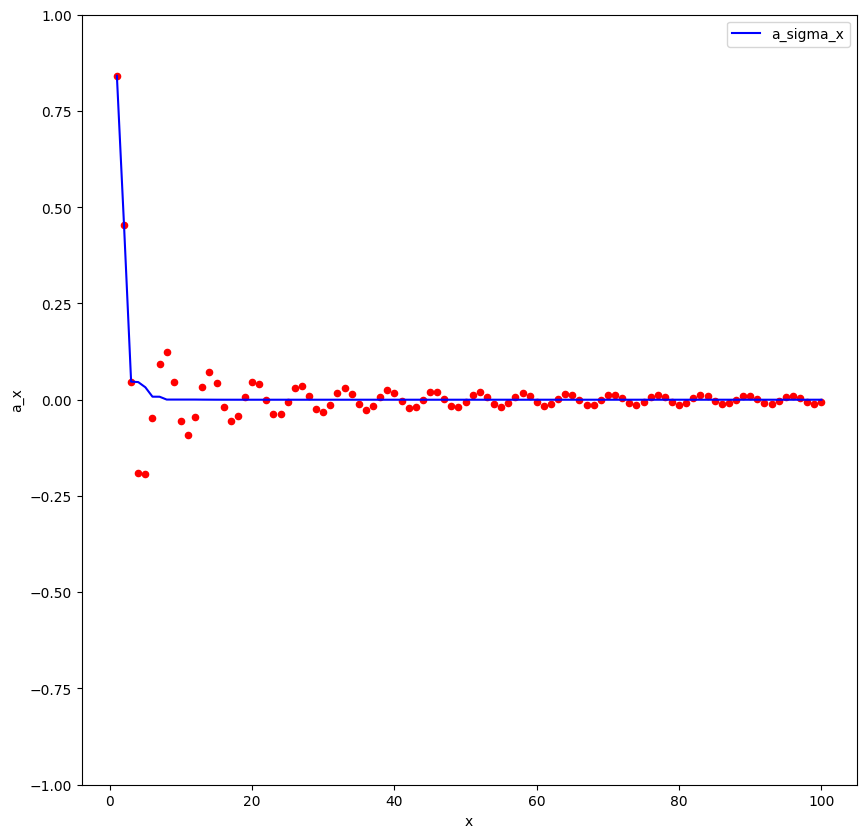

In [71]:
def generate_graph_value_dict(n):
    return {"x" : [i for i in range(1, n + 1)], "a_x": [a_n(i) for i in range(1, n + 1)], "a_sigma_x": [a_n(sigma_x) for sigma_x in calculate_n_sigma_values(n)]}

def graph_results(graph_value_dict):
    graph_value_df = pd.DataFrame(graph_value_dict)
    plot = graph_value_df.plot(kind="scatter", x="x", y="a_x", color="red", figsize=(10, 10), ylim=(-1, 1))
    graph_value_df.plot(kind="line", x="x", y="a_sigma_x", ax=plot, color="blue", figsize=(10, 10))

# finds and graphs 14 terms of the initial series, and 14 terms of the monotonically decreasing subsequence
graph_value_dict = generate_graph_value_dict(100)
graph_results(graph_value_dict)